In [1]:
from pathlib import Path


_artifact_path = "../artifacts/05_06_2025_15_10_06/data_ingestion"
root_dir = Path(f"{_artifact_path}/data")
train_path = root_dir / "train"
test_path = root_dir / "test"

train_path, test_path

(PosixPath('../artifacts/05_06_2025_15_10_06/data_ingestion/data/train'),
 PosixPath('../artifacts/05_06_2025_15_10_06/data_ingestion/data/test'))

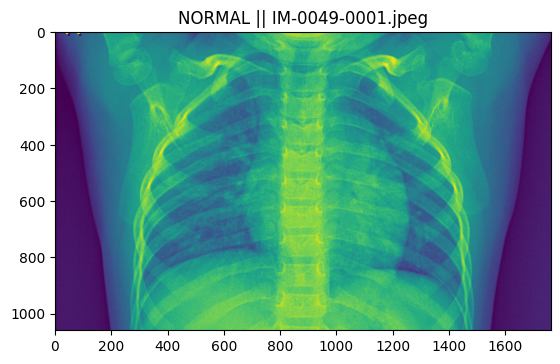

In [2]:
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt


train_data = ImageFolder(root=train_path)
a, _ = train_data.samples[35] # idx

plt.title(f"{Path(a).parts[-2]} || {Path(a).name}")
plt.imshow(plt.imread(a))
plt.show()

In [3]:
from typing import List


BRIGHTNESS:float = 0.1
CONTRAST:float = 0.1
SATURATION:float = 0.1
HUE:float = 0.1
RESIZE:int = 224
CENTER_CROP:int = 224
RANDOM_ROTATION:int = 10
NORMALIZE_LIST_1:List[int] = [0.485, 0.456, 0.406]
NORMALIZE_LIST_2:List[int] = [0.229, 0.224, 0.225]
BATCH_SIZE:int = 2
SHUFFLE:bool = False
PIN_MEMORY:bool = True

In [4]:
from torchvision import transforms


train_transforms = transforms.Compose([
    transforms.Resize(RESIZE),
    transforms.CenterCrop(CENTER_CROP),
    transforms.ColorJitter(
        brightness=BRIGHTNESS,
        contrast=CONTRAST,
        saturation=SATURATION,
        hue=HUE
    ),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(RANDOM_ROTATION),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=NORMALIZE_LIST_1,
        std=NORMALIZE_LIST_2
    )
])

test_transforms = transforms.Compose([
    transforms.Resize(RESIZE),
    transforms.CenterCrop(CENTER_CROP),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=NORMALIZE_LIST_1,
        std=NORMALIZE_LIST_2
    )
])


In [5]:
from torchvision.datasets import ImageFolder


train_data = ImageFolder(root=train_path, transform=train_transforms)
test_data = ImageFolder(root=test_path, transform=test_transforms)

classes = train_data.classes

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 212
     Root location: ../artifacts/05_06_2025_15_10_06/data_ingestion/data/train
     StandardTransform
 Transform: Compose(
                Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(-0.1, 0.1))
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 60
     Root location: ../artifacts/05_06_2025_15_10_06/data_ingestion/data/test
     StandardTransform
 Transform: Compose(
                Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
          

In [6]:
from torch.utils.data import DataLoader


train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=SHUFFLE,
    pin_memory=PIN_MEMORY)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=SHUFFLE,
    pin_memory=PIN_MEMORY
)


In [7]:
# check color channel 

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


class DebugImageFolder(ImageFolder):
    def __getitem__(self, index):
        path, target = self.samples[index]
        sample = self.loader(path)
        print(f"PIL image mode: {sample.mode}") # PIL image mode
        if self.transform is not None:
            sample = self.transform(sample)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return sample, target


debug_dataset = DebugImageFolder(root=root_dir, transform=train_transforms)
debug_dataloader = DataLoader(debug_dataset, batch_size=2, shuffle=True)

x = iter(debug_dataloader)
next(x)[0].shape

PIL image mode: RGB
PIL image mode: RGB


torch.Size([2, 3, 224, 224])

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(8)
        )

        self.pool_1 = nn.MaxPool2d(2, 2)

        self.conv_2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=20, kernel_size=3, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )

        self.pool_2 = nn.MaxPool2d(2, 2)

        self.conv_3 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=1, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )

        self.pool_3 = nn.MaxPool2d(2, 2)

        self.conv_4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )

        self.conv_5 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=32, kernel_size=1, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(32)
        )

        self.conv_6 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=3, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )

        self.conv_7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=1, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )

        self.conv_8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=14, kernel_size=3, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(14)
        )

        self.conv_9 = nn.Sequential(
            nn.Conv2d(in_channels=14, out_channels=16, kernel_size=3, padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )

        self.gap = nn.Sequential(nn.AvgPool2d(kernel_size=4))

        self.conv_out = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=2, kernel_size=4, padding=0, bias=True)
        )

    def forward(self, x):
        x = self.pool_3(self.conv_3(
                self.pool_2(self.conv_2(
                    self.pool_1(self.conv_1(x))
                ))
            ))
        
        x = self.conv_9(self.conv_8(
                self.conv_7(self.conv_6(
                    self.conv_5(self.conv_4(x))
                ))
            ))
        
        x = self.conv_out(self.gap(x))
        
        return F.log_softmax(x.view(-1, 2), dim=1)
    

In [9]:
import torch

# print(torch.cuda.is_available())
# print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No CUDA device found")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

NVIDIA GeForce RTX 3060


device(type='cuda')

In [10]:
from torchinfo import summary


model = Net().to(device)
summary(model,
        input_size=(BATCH_SIZE, 3, RESIZE, RESIZE), # (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
Net (Net)                                [2, 3, 224, 224]     [2, 2]               --                   True
├─Sequential (conv_1)                    [2, 3, 224, 224]     [2, 8, 222, 222]     --                   True
│    └─Conv2d (0)                        [2, 3, 224, 224]     [2, 8, 222, 222]     224                  True
│    └─ReLU (1)                          [2, 8, 222, 222]     [2, 8, 222, 222]     --                   --
│    └─BatchNorm2d (2)                   [2, 8, 222, 222]     [2, 8, 222, 222]     16                   True
├─MaxPool2d (pool_1)                     [2, 8, 222, 222]     [2, 8, 111, 111]     --                   --
├─Sequential (conv_2)                    [2, 8, 111, 111]     [2, 20, 109, 109]    --                   True
│    └─Conv2d (0)                        [2, 8, 111, 111]     [2, 20, 109, 109]    1,460                True
│    └─ReLU (1)   

In [11]:
train_losses = []
train_accuracy = []

In [12]:
from torch.nn import Module
from torch.optim import Optimizer
from torch.utils.data import DataLoader
import torch.nn.functional as F

from tqdm import tqdm


def train(model:Module, train_loader:DataLoader, optimizer:Optimizer, device:str):
    model.train()

    pbar = tqdm(train_loader)

    correct = 0
    processed = 0

    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        y_pred = model(data)
        loss = F.nll_loss(y_pred, target) # negative log likelihood loss

        train_losses.append(loss)

        loss.backward()
        optimizer.step()

        #
        pred = y_pred.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        
        pbar.set_description(
            desc=f"Loss={loss.item()} | Batch ID={batch_idx} | Accuracy={100.0 * correct / processed:0.2f}"
        )

        train_accuracy.append(100.0 * correct / processed)

    pbar.close()


In [13]:
test_losses = []
test_accuracy = []

In [14]:
from torch.nn import Module
from torch.utils.data import DataLoader
import torch.nn.functional as F


def test(model:Module, test_loader:DataLoader, device:str) -> str:
    model.eval()

    test_loss = 0
    correct = 0

    with torch.inference_mode():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            output = model(data)
            test_loss += F.nll_loss(output, target, reduction="sum").item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        
        print(f"Average Loss={test_loss:.4f} | Accuracy={100.0 * correct / len(test_loader.dataset)}")
        
        test_accuracy.append(100.0 * correct / len(test_loader.dataset))


In [17]:
from torch.optim.lr_scheduler import StepLR


model = Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=10, gamma=0.2)
epochs = 100

# print("Current Learning Rate: ", optimizer.state_dict()["param_groups"][0]["lr"])

def do_train(model):

    for epoch in range(epochs):
        print("Epoch: ", epoch)

        train(model=model, train_loader=train_dataloader, optimizer=optimizer, device=device)
        
        scheduler.step()

        test(model=model, test_loader=test_dataloader, device=device)

do_train(model)

Epoch:  0


Loss=0.11713466793298721 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 35.85it/s]


Average Loss=1.7258 | Accuracy=50.0
Epoch:  1


Loss=0.012287459336221218 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 36.20it/s]


Average Loss=2.5780 | Accuracy=48.333333333333336
Epoch:  2


Loss=0.017274238169193268 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.97it/s]


Average Loss=1.9554 | Accuracy=50.0
Epoch:  3


Loss=0.04044647514820099 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 36.39it/s] 


Average Loss=1.6435 | Accuracy=50.0
Epoch:  4


Loss=0.024190613999962807 | Batch ID=105 | Accuracy=92.92: 100%|██████████| 106/106 [00:02<00:00, 36.03it/s]


Average Loss=2.1445 | Accuracy=48.333333333333336
Epoch:  5


Loss=0.044092826545238495 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 36.11it/s]


Average Loss=1.3441 | Accuracy=51.666666666666664
Epoch:  6


Loss=0.035644929856061935 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.64it/s]


Average Loss=1.6470 | Accuracy=50.0
Epoch:  7


Loss=0.016819072887301445 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 36.17it/s]


Average Loss=1.1691 | Accuracy=50.0
Epoch:  8


Loss=0.03387819603085518 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 36.02it/s] 


Average Loss=1.1813 | Accuracy=55.0
Epoch:  9


Loss=0.02268352173268795 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.68it/s] 


Average Loss=1.1075 | Accuracy=56.666666666666664
Epoch:  10


Loss=0.07852821797132492 | Batch ID=105 | Accuracy=86.32: 100%|██████████| 106/106 [00:02<00:00, 35.81it/s] 


Average Loss=0.4527 | Accuracy=81.66666666666667
Epoch:  11


Loss=0.3281383812427521 | Batch ID=105 | Accuracy=91.51: 100%|██████████| 106/106 [00:02<00:00, 35.72it/s] 


Average Loss=0.3631 | Accuracy=85.0
Epoch:  12


Loss=0.340510755777359 | Batch ID=105 | Accuracy=92.92: 100%|██████████| 106/106 [00:02<00:00, 36.11it/s]   


Average Loss=0.2423 | Accuracy=93.33333333333333
Epoch:  13


Loss=0.019086986780166626 | Batch ID=105 | Accuracy=91.04: 100%|██████████| 106/106 [00:02<00:00, 35.85it/s]


Average Loss=0.4266 | Accuracy=80.0
Epoch:  14


Loss=0.03905721753835678 | Batch ID=105 | Accuracy=93.87: 100%|██████████| 106/106 [00:02<00:00, 36.11it/s]


Average Loss=0.4367 | Accuracy=83.33333333333333
Epoch:  15


Loss=0.055260978639125824 | Batch ID=105 | Accuracy=93.40: 100%|██████████| 106/106 [00:02<00:00, 36.40it/s]


Average Loss=1.0031 | Accuracy=56.666666666666664
Epoch:  16


Loss=0.07121232151985168 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 35.97it/s]  


Average Loss=0.1848 | Accuracy=93.33333333333333
Epoch:  17


Loss=0.038844719529151917 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.78it/s]


Average Loss=0.1661 | Accuracy=91.66666666666667
Epoch:  18


Loss=0.09405378997325897 | Batch ID=105 | Accuracy=93.40: 100%|██████████| 106/106 [00:02<00:00, 36.05it/s] 


Average Loss=0.3973 | Accuracy=80.0
Epoch:  19


Loss=0.0640643984079361 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 36.09it/s]  


Average Loss=0.2678 | Accuracy=88.33333333333333
Epoch:  20


Loss=0.06534443795681 | Batch ID=105 | Accuracy=89.15: 100%|██████████| 106/106 [00:02<00:00, 36.44it/s]    


Average Loss=0.1184 | Accuracy=95.0
Epoch:  21


Loss=0.6157609820365906 | Batch ID=105 | Accuracy=93.87: 100%|██████████| 106/106 [00:02<00:00, 36.20it/s]  


Average Loss=0.1114 | Accuracy=96.66666666666667
Epoch:  22


Loss=0.6093546152114868 | Batch ID=105 | Accuracy=92.45: 100%|██████████| 106/106 [00:02<00:00, 36.01it/s]  


Average Loss=0.1004 | Accuracy=96.66666666666667
Epoch:  23


Loss=0.1622331589460373 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.80it/s]   


Average Loss=0.1052 | Accuracy=96.66666666666667
Epoch:  24


Loss=0.12088483572006226 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 36.11it/s]


Average Loss=0.0998 | Accuracy=96.66666666666667
Epoch:  25


Loss=0.2248729020357132 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.86it/s]  


Average Loss=0.0987 | Accuracy=95.0
Epoch:  26


Loss=0.22408999502658844 | Batch ID=105 | Accuracy=93.87: 100%|██████████| 106/106 [00:02<00:00, 36.24it/s]


Average Loss=0.1066 | Accuracy=96.66666666666667
Epoch:  27


Loss=0.18726453185081482 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 35.73it/s]


Average Loss=0.1148 | Accuracy=96.66666666666667
Epoch:  28


Loss=0.22391724586486816 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.88it/s] 


Average Loss=0.1097 | Accuracy=96.66666666666667
Epoch:  29


Loss=0.2418513000011444 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 35.86it/s] 


Average Loss=0.1372 | Accuracy=95.0
Epoch:  30


Loss=0.6035491228103638 | Batch ID=105 | Accuracy=93.87: 100%|██████████| 106/106 [00:02<00:00, 36.47it/s] 


Average Loss=0.0977 | Accuracy=96.66666666666667
Epoch:  31


Loss=0.870594322681427 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 36.02it/s]   


Average Loss=0.1148 | Accuracy=96.66666666666667
Epoch:  32


Loss=0.17977164685726166 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 36.38it/s]


Average Loss=0.1084 | Accuracy=96.66666666666667
Epoch:  33


Loss=0.4472847580909729 | Batch ID=105 | Accuracy=93.87: 100%|██████████| 106/106 [00:02<00:00, 36.33it/s]  


Average Loss=0.0977 | Accuracy=96.66666666666667
Epoch:  34


Loss=0.31887122988700867 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 35.76it/s] 


Average Loss=0.1134 | Accuracy=95.0
Epoch:  35


Loss=0.5388640761375427 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 36.09it/s] 


Average Loss=0.1130 | Accuracy=95.0
Epoch:  36


Loss=0.483717679977417 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 36.10it/s]   


Average Loss=0.0873 | Accuracy=98.33333333333333
Epoch:  37


Loss=0.4741877317428589 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.71it/s]  


Average Loss=0.1003 | Accuracy=96.66666666666667
Epoch:  38


Loss=0.5882509350776672 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 36.14it/s] 


Average Loss=0.1059 | Accuracy=96.66666666666667
Epoch:  39


Loss=0.1807730793952942 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.56it/s]  


Average Loss=0.1165 | Accuracy=95.0
Epoch:  40


Loss=0.30535346269607544 | Batch ID=105 | Accuracy=93.87: 100%|██████████| 106/106 [00:02<00:00, 35.83it/s] 


Average Loss=0.1196 | Accuracy=95.0
Epoch:  41


Loss=0.7862257957458496 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 35.84it/s] 


Average Loss=0.1082 | Accuracy=95.0
Epoch:  42


Loss=0.19838057458400726 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.87it/s] 


Average Loss=0.1167 | Accuracy=95.0
Epoch:  43


Loss=0.2867524027824402 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 35.68it/s] 


Average Loss=0.0981 | Accuracy=96.66666666666667
Epoch:  44


Loss=1.0133591890335083 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 35.72it/s]  


Average Loss=0.1158 | Accuracy=95.0
Epoch:  45


Loss=0.45466214418411255 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.96it/s] 


Average Loss=0.1087 | Accuracy=95.0
Epoch:  46


Loss=0.5305408835411072 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 35.48it/s]  


Average Loss=0.0955 | Accuracy=96.66666666666667
Epoch:  47


Loss=0.5136289000511169 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 36.01it/s]  


Average Loss=0.1130 | Accuracy=95.0
Epoch:  48


Loss=0.43159031867980957 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 36.11it/s] 


Average Loss=0.1088 | Accuracy=95.0
Epoch:  49


Loss=0.27206549048423767 | Batch ID=105 | Accuracy=93.40: 100%|██████████| 106/106 [00:02<00:00, 35.93it/s] 


Average Loss=0.1257 | Accuracy=95.0
Epoch:  50


Loss=0.25627902150154114 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 36.05it/s] 


Average Loss=0.1008 | Accuracy=95.0
Epoch:  51


Loss=0.550678014755249 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 35.70it/s]   


Average Loss=0.1313 | Accuracy=95.0
Epoch:  52


Loss=0.6164013147354126 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.84it/s]  


Average Loss=0.1478 | Accuracy=93.33333333333333
Epoch:  53


Loss=0.46120840311050415 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.96it/s] 


Average Loss=0.1202 | Accuracy=95.0
Epoch:  54


Loss=0.20604993402957916 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 35.84it/s]


Average Loss=0.1068 | Accuracy=95.0
Epoch:  55


Loss=0.13753457367420197 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.81it/s] 


Average Loss=0.1278 | Accuracy=93.33333333333333
Epoch:  56


Loss=0.7614413499832153 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.67it/s] 


Average Loss=0.1100 | Accuracy=95.0
Epoch:  57


Loss=0.7864571213722229 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.93it/s]  


Average Loss=0.1212 | Accuracy=95.0
Epoch:  58


Loss=0.3209367096424103 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 36.01it/s] 


Average Loss=0.0922 | Accuracy=96.66666666666667
Epoch:  59


Loss=0.34963491559028625 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 36.01it/s] 


Average Loss=0.0968 | Accuracy=96.66666666666667
Epoch:  60


Loss=0.39857423305511475 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 36.28it/s]


Average Loss=0.1170 | Accuracy=95.0
Epoch:  61


Loss=1.0692689418792725 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 36.66it/s]  


Average Loss=0.1104 | Accuracy=95.0
Epoch:  62


Loss=0.37463971972465515 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.94it/s] 


Average Loss=0.1222 | Accuracy=95.0
Epoch:  63


Loss=0.48335832357406616 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 36.14it/s] 


Average Loss=0.1219 | Accuracy=95.0
Epoch:  64


Loss=0.205043762922287 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 36.23it/s]   


Average Loss=0.0910 | Accuracy=98.33333333333333
Epoch:  65


Loss=0.8951981067657471 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 36.09it/s]  


Average Loss=0.1193 | Accuracy=95.0
Epoch:  66


Loss=0.5526329278945923 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 36.42it/s]  


Average Loss=0.0960 | Accuracy=96.66666666666667
Epoch:  67


Loss=0.1612110733985901 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.93it/s]  


Average Loss=0.1099 | Accuracy=95.0
Epoch:  68


Loss=0.6327023506164551 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 35.74it/s]  


Average Loss=0.1196 | Accuracy=95.0
Epoch:  69


Loss=0.24828416109085083 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.84it/s] 


Average Loss=0.1078 | Accuracy=95.0
Epoch:  70


Loss=1.4730899333953857 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 36.03it/s] 


Average Loss=0.1263 | Accuracy=95.0
Epoch:  71


Loss=0.2003706693649292 | Batch ID=105 | Accuracy=97.17: 100%|██████████| 106/106 [00:02<00:00, 35.75it/s]  


Average Loss=0.0971 | Accuracy=96.66666666666667
Epoch:  72


Loss=0.16460953652858734 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 36.31it/s] 


Average Loss=0.1142 | Accuracy=95.0
Epoch:  73


Loss=0.4597699046134949 | Batch ID=105 | Accuracy=91.98: 100%|██████████| 106/106 [00:02<00:00, 35.91it/s]  


Average Loss=0.0993 | Accuracy=95.0
Epoch:  74


Loss=0.4143231213092804 | Batch ID=105 | Accuracy=93.87: 100%|██████████| 106/106 [00:02<00:00, 36.15it/s]  


Average Loss=0.1353 | Accuracy=95.0
Epoch:  75


Loss=0.2086826115846634 | Batch ID=105 | Accuracy=92.45: 100%|██████████| 106/106 [00:02<00:00, 35.62it/s] 


Average Loss=0.1276 | Accuracy=95.0
Epoch:  76


Loss=0.7821995615959167 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 35.62it/s]  


Average Loss=0.1223 | Accuracy=95.0
Epoch:  77


Loss=0.1656828075647354 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 35.96it/s]  


Average Loss=0.1195 | Accuracy=95.0
Epoch:  78


Loss=0.5042847394943237 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 36.12it/s]  


Average Loss=0.1037 | Accuracy=95.0
Epoch:  79


Loss=0.10750874131917953 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 36.16it/s]


Average Loss=0.1101 | Accuracy=95.0
Epoch:  80


Loss=0.825480580329895 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 36.17it/s]   


Average Loss=0.1048 | Accuracy=95.0
Epoch:  81


Loss=0.32241541147232056 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 36.01it/s] 


Average Loss=0.1099 | Accuracy=95.0
Epoch:  82


Loss=0.1486586034297943 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.63it/s]  


Average Loss=0.1416 | Accuracy=95.0
Epoch:  83


Loss=0.6222304701805115 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 35.95it/s]  


Average Loss=0.1194 | Accuracy=95.0
Epoch:  84


Loss=0.186086967587471 | Batch ID=105 | Accuracy=93.87: 100%|██████████| 106/106 [00:02<00:00, 36.52it/s]  


Average Loss=0.1171 | Accuracy=95.0
Epoch:  85


Loss=0.5599189400672913 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 37.77it/s]  


Average Loss=0.1252 | Accuracy=95.0
Epoch:  86


Loss=0.6782108545303345 | Batch ID=105 | Accuracy=94.34: 100%|██████████| 106/106 [00:02<00:00, 37.40it/s] 


Average Loss=0.1417 | Accuracy=95.0
Epoch:  87


Loss=0.31295138597488403 | Batch ID=105 | Accuracy=97.64: 100%|██████████| 106/106 [00:02<00:00, 36.92it/s] 


Average Loss=0.1137 | Accuracy=95.0
Epoch:  88


Loss=0.6408140063285828 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 37.98it/s]  


Average Loss=0.1132 | Accuracy=95.0
Epoch:  89


Loss=0.1261228621006012 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 37.02it/s]  


Average Loss=0.0934 | Accuracy=95.0
Epoch:  90


Loss=0.1499388962984085 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 37.90it/s]  


Average Loss=0.0918 | Accuracy=98.33333333333333
Epoch:  91


Loss=0.9849583506584167 | Batch ID=105 | Accuracy=96.70: 100%|██████████| 106/106 [00:02<00:00, 37.86it/s]  


Average Loss=0.1244 | Accuracy=95.0
Epoch:  92


Loss=0.5681392550468445 | Batch ID=105 | Accuracy=96.23: 100%|██████████| 106/106 [00:02<00:00, 37.96it/s] 


Average Loss=0.1054 | Accuracy=95.0
Epoch:  93


Loss=0.09230077266693115 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 37.20it/s] 


Average Loss=0.1035 | Accuracy=95.0
Epoch:  94


Loss=0.28376707434654236 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 35.77it/s] 


Average Loss=0.1205 | Accuracy=95.0
Epoch:  95


Loss=0.2976110279560089 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.57it/s]  


Average Loss=0.1103 | Accuracy=95.0
Epoch:  96


Loss=0.4716574251651764 | Batch ID=105 | Accuracy=95.75: 100%|██████████| 106/106 [00:02<00:00, 35.99it/s]  


Average Loss=0.1144 | Accuracy=95.0
Epoch:  97


Loss=0.8024300336837769 | Batch ID=105 | Accuracy=95.28: 100%|██████████| 106/106 [00:02<00:00, 35.57it/s]  


Average Loss=0.0959 | Accuracy=96.66666666666667
Epoch:  98


Loss=0.30075180530548096 | Batch ID=105 | Accuracy=92.45: 100%|██████████| 106/106 [00:02<00:00, 36.78it/s] 


Average Loss=0.1128 | Accuracy=95.0
Epoch:  99


Loss=1.3805423974990845 | Batch ID=105 | Accuracy=94.81: 100%|██████████| 106/106 [00:02<00:00, 36.19it/s] 


Average Loss=0.1158 | Accuracy=95.0


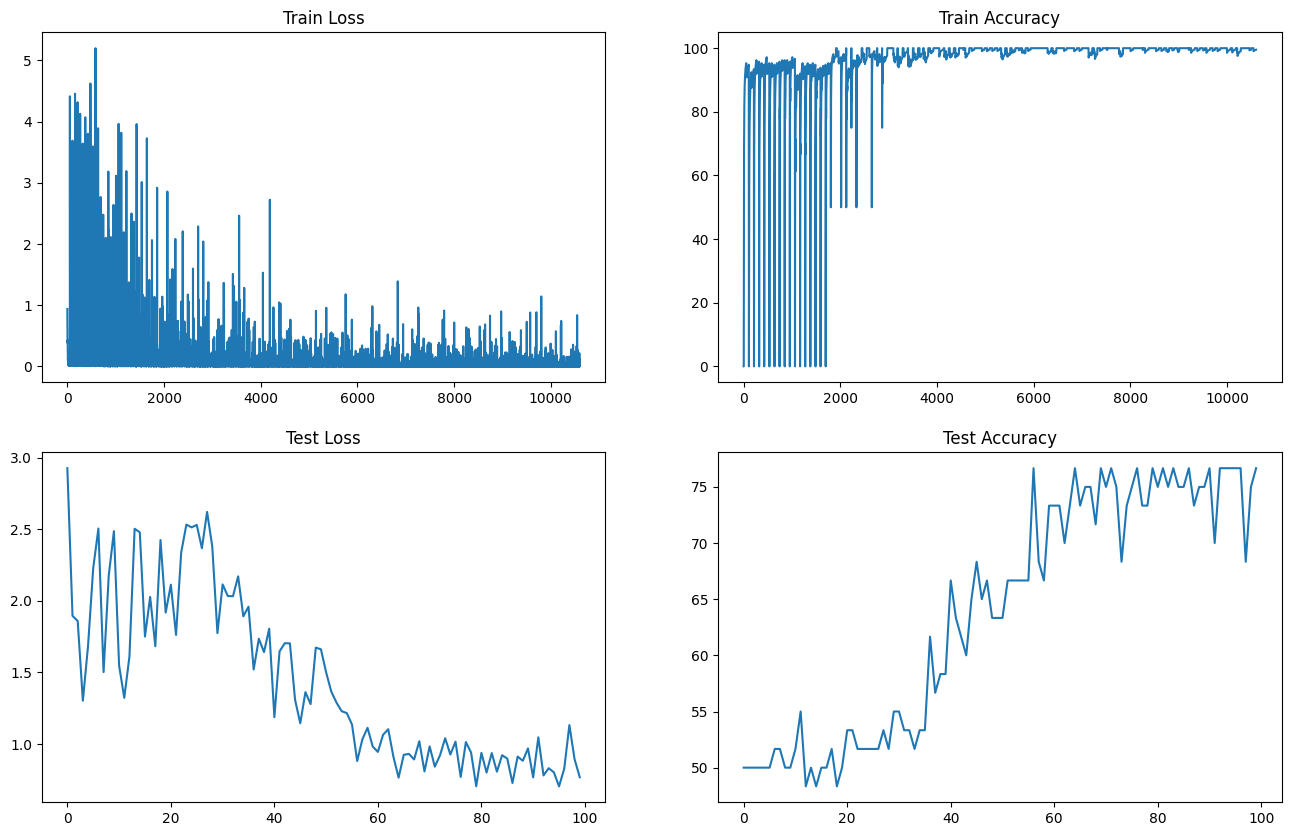

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# plt.title("Test Accuracy")
# plt.plot(test_accuracy)
# plt.show()

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs[0,0].set_title("Train Loss")
axs[0,0].plot([float(i.cpu().detach().numpy()) for i in train_losses])

axs[0,1].set_title("Train Accuracy")
axs[0,1].plot(train_accuracy)

axs[1,0].set_title("Test Loss")
axs[1,0].plot(test_losses)

axs[1,1].set_title("Test Accuracy")
axs[1,1].plot(test_accuracy)

plt.show()
